<h2>Importing Libraries and Data</h2>

In [1173]:
%%time
import pandas as pd
import numpy as np
from IPython.display import display
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression	
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
plt.style.use('ggplot')

CPU times: user 297 µs, sys: 2 µs, total: 299 µs
Wall time: 306 µs


In [1174]:
df_contract = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/interconnect/final_provider/contract.csv', encoding = "utf-8", parse_dates=[1])
df_internet = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/interconnect/final_provider/internet.csv', encoding = "utf-8")
df_personal = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/interconnect/final_provider/personal.csv', encoding = "utf-8")
df_phone = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/interconnect/final_provider/phone.csv', encoding = "utf-8")

<h2>Contract Data</h2>

In [1175]:
display(df_contract.sample(10))
df_contract.info


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3124,3889-VWBID,2014-06-01,No,Two year,No,Bank transfer (automatic),82.85,5776.45
1461,6234-PFPXL,2018-04-01,No,Month-to-month,No,Credit card (automatic),95.90,2234.95
7007,2274-XUATA,2014-02-01,No,Two year,Yes,Bank transfer (automatic),63.10,4685.55
1247,5593-SUAOO,2018-02-01,No,One year,No,Bank transfer (automatic),83.15,2033.05
2011,1492-QGCLU,2015-09-01,No,Month-to-month,No,Electronic check,85.70,4616.1
3019,6214-EDAKZ,2018-01-01,2019-11-01 00:00:00,Month-to-month,No,Electronic check,55.15,1206.05
5758,5847-MXBEO,2018-04-01,No,One year,No,Mailed check,20.30,475.1
4491,7853-WNZSY,2020-01-01,No,Month-to-month,Yes,Credit card (automatic),19.75,19.75
730,6439-GTPCA,2016-02-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,87.25,3941.7
3169,4578-PHJYZ,2015-10-01,No,One year,Yes,Electronic check,68.75,3482.85


<bound method DataFrame.info of       customerID  BeginDate              EndDate            Type  \
0     7590-VHVEG 2020-01-01                   No  Month-to-month   
1     5575-GNVDE 2017-04-01                   No        One year   
2     3668-QPYBK 2019-10-01  2019-12-01 00:00:00  Month-to-month   
3     7795-CFOCW 2016-05-01                   No        One year   
4     9237-HQITU 2019-09-01  2019-11-01 00:00:00  Month-to-month   
...          ...        ...                  ...             ...   
7038  6840-RESVB 2018-02-01                   No        One year   
7039  2234-XADUH 2014-02-01                   No        One year   
7040  4801-JZAZL 2019-03-01                   No  Month-to-month   
7041  8361-LTMKD 2019-07-01  2019-11-01 00:00:00  Month-to-month   
7042  3186-AJIEK 2014-08-01                   No        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0                 Yes           Electronic check           29.85       

In [1176]:
df_contract.rename(columns={'customerID': 'customer_id', 'BeginDate': 'begin_date', 'EndDate': 'end_date', 'Type': 'type', 'PaperlessBilling': 'paperless_billing', 'PaymentMethod': 'payment_method', 'MonthlyCharges': 'monthly_charges', 'TotalCharges': 'total_charges'}, inplace=True)

df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


In [1177]:
print(df_contract.duplicated().sum())
print(df_contract.duplicated(subset=['customer_id', 'begin_date']).sum())
print(df_contract.duplicated(subset=['customer_id', 'end_date']).sum())
print(df_contract.duplicated(subset=['customer_id', 'type']).sum())
print(df_contract.duplicated(subset=['customer_id', 'paperless_billing']).sum())
print(df_contract.duplicated(subset=['customer_id', 'payment_method']).sum())
print(df_contract.duplicated(subset=['customer_id', 'monthly_charges']).sum())
print(df_contract.duplicated(subset=['customer_id', 'total_charges']).sum())

0
0
0
0
0
0
0
0


In [1178]:
print(df_contract['type'].unique())
print(df_contract['payment_method'].unique())

['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


<h2>Internet Plan Data</h2>

In [1179]:
display(df_internet.sample(10))
df_internet.info()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
3566,1866-DIOQZ,DSL,Yes,Yes,Yes,Yes,Yes,Yes
4375,1660-HSOOQ,DSL,No,No,Yes,No,No,No
3014,0237-YFUTL,Fiber optic,Yes,Yes,No,Yes,Yes,Yes
5199,3967-KXAPS,DSL,Yes,Yes,Yes,Yes,Yes,Yes
2577,2636-ALXXZ,Fiber optic,No,No,No,No,No,No
1685,3023-GFLBR,Fiber optic,No,No,No,No,No,Yes
5312,5626-MGTUK,Fiber optic,Yes,No,No,No,Yes,No
4075,5336-UFNZP,Fiber optic,No,Yes,Yes,No,Yes,Yes
3259,0769-MURVM,DSL,Yes,Yes,Yes,Yes,Yes,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [1180]:
df_internet.rename(columns={'customerID': 'customer_id', 'InternetService': 'internet_service', 'OnlineSecurity': 'online_security', 'OnlineBackup': 'online_backup', 'DeviceProtection': 'device_protection', 'TechSupport': 'tech_support', 'StreamingTV': 'streaming_tv', 'StreamingMovies': 'streaming_movies'}, inplace=True)

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [1181]:
print(df_internet.duplicated().sum())
print(df_internet.duplicated(subset=['customer_id', 'internet_service']).sum())
print(df_internet.duplicated(subset=['customer_id', 'online_security']).sum())
print(df_internet.duplicated(subset=['customer_id', 'online_backup']).sum())
print(df_internet.duplicated(subset=['customer_id', 'device_protection']).sum())
print(df_internet.duplicated(subset=['customer_id', 'tech_support']).sum())
print(df_internet.duplicated(subset=['customer_id', 'streaming_tv']).sum())
print(df_internet.duplicated(subset=['customer_id', 'streaming_movies']).sum())

0
0
0
0
0
0
0
0


In [1182]:
internet_customers = len(df_internet) / len(df_contract) * 100
active_internet_customers = len(df_internet) / len(df_contract[df_contract['end_date'] == 'No']) * 100
print('The percentage of customers who have contracts who also have internet contracts is ', internet_customers, '%')
print('The percentage of customers who have active contracts who also have internet contracts is ', active_internet_customers, '%')

The percentage of customers who have contracts who also have internet contracts is  78.33309669175067 %
The percentage of customers who have active contracts who also have internet contracts is  106.6293003478933 %


In [1183]:
print(df_internet['internet_service'].unique())


['DSL' 'Fiber optic']


In [1184]:
display(df_internet.sample(10))

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
1608,7398-HPYZQ,DSL,Yes,Yes,Yes,Yes,Yes,Yes
4484,8882-TLVRW,DSL,Yes,No,Yes,Yes,No,No
284,0513-RBGPE,DSL,Yes,No,Yes,Yes,No,No
4120,8780-IXSTS,Fiber optic,No,Yes,No,No,Yes,No
3534,6578-KRMAW,Fiber optic,Yes,Yes,Yes,No,No,Yes
1757,9917-KWRBE,DSL,Yes,Yes,Yes,No,Yes,No
2968,6712-OAWRH,Fiber optic,No,No,No,No,Yes,Yes
4628,4192-GORJT,Fiber optic,No,No,Yes,No,Yes,Yes
4557,2969-QWUBZ,DSL,No,Yes,No,No,Yes,Yes
5229,7895-VONWT,DSL,No,No,Yes,No,Yes,Yes


<h2>Customer Data</h2>

In [1185]:
display(df_personal.sample(10))
df_personal.info()

,customerID,gender,SeniorCitizen,Partner,Dependents
1330,0661-WCQNQ,Male,0,Yes,No
2106,4547-FZJWE,Male,0,Yes,Yes
5042,1561-BWHIN,Male,0,Yes,Yes
3740,0508-OOLTO,Female,0,Yes,Yes
2966,8648-PFRMP,Female,1,No,No
5388,5515-IDEJJ,Male,0,Yes,Yes
2605,1790-NESIO,Female,0,No,No
3814,6701-YVNQG,Male,0,Yes,No
6731,0164-XAIRP,Female,0,No,No
2529,0022-TCJCI,Male,1,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [1186]:
df_personal.rename(columns={'customerID': 'customer_id', 'SeniorCitizen': 'senior_citizen', 'Partner': 'partner', 'Dependents': 'dependents'}, inplace=True)

df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [1187]:
print(df_personal.duplicated().sum())
print(df_personal.duplicated(subset=['customer_id', 'gender']).sum())
print(df_personal.duplicated(subset=['customer_id', 'senior_citizen']).sum())
print(df_personal.duplicated(subset=['customer_id', 'partner']).sum())
print(df_personal.duplicated(subset=['customer_id', 'dependents']).sum())

0
0
0
0
0


<h2>Phone Data</h2>

In [1188]:
display(df_phone.sample(10))
df_phone.info()

,customerID,MultipleLines
524,3627-FHKBK,No
5907,7235-NXZCP,Yes
5754,3214-IYUUQ,No
1479,2929-QNSRW,Yes
122,6217-KDYWC,No
1404,0330-IVZHA,No
4166,7524-VRLPL,Yes
4236,6616-AALSR,Yes
733,1820-TQVEV,No
3455,2800-QQUSO,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [1189]:
df_phone.rename(columns={'customerID': 'customer_id', 'MultipleLines': 'multiple_lines'}, inplace=True)

df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [1190]:
print(df_phone.duplicated().sum())

0


In [1191]:
phone_customers = len(df_phone) / len(df_contract) * 100
active_phone_customers = len(df_phone) / len(df_contract[df_contract['end_date'] == 'No']) * 100
print('The percentage of customers who have contracts who also have phone contracts is ', phone_customers, '%')
print('The percentage of customers who have active contracts who also have phone contracts is ', active_phone_customers, '%')

The percentage of customers who have contracts who also have phone contracts is  90.31662643759762 %
The percentage of customers who have active contracts who also have phone contracts is  122.94163123308851 %


<h2>Merging the Dataframes</h2>

In [1192]:
df_merge = df_contract.merge(df_personal,
                             left_on='customer_id', right_on='customer_id',
                             suffixes=['_contract', '_personal'])


In [1193]:
display(df_merge.sample(10))
df_merge.info()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents
2767,3572-UOLYZ,2016-04-01,No,Month-to-month,Yes,Bank transfer (automatic),84.80,3958.85,Female,0,No,Yes
38,5380-WJKOV,2017-02-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,106.35,3549.25,Male,0,No,No
2840,7299-GNVPL,2018-03-01,No,Month-to-month,No,Mailed check,84.40,1936.85,Female,0,Yes,Yes
2077,3177-LASXD,2019-09-01,2019-10-01 00:00:00,Month-to-month,No,Electronic check,71.35,71.35,Female,0,No,No
5541,6804-GDMOI,2014-12-01,2020-01-01 00:00:00,Two year,Yes,Electronic check,106.60,6428.4,Female,0,No,No
4099,6624-JDRDS,2019-08-01,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,Female,0,No,No
966,4541-RMRLG,2019-04-01,2019-11-01 00:00:00,Month-to-month,No,Electronic check,19.25,112.3,Male,0,No,No
2151,2560-WBWXF,2014-06-01,No,Two year,Yes,Bank transfer (automatic),24.15,1498.85,Male,0,No,No
2017,1087-GRUYI,2016-12-01,No,Two year,No,Bank transfer (automatic),20.40,743.5,Male,0,Yes,No
2447,1475-VWVDO,2019-07-01,No,Month-to-month,Yes,Electronic check,74.90,490.55,Male,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 660.4+ KB


In [1194]:
df_merge_1 = df_merge.merge(df_internet,
                             left_on='customer_id',
                             right_on='customer_id',
                             how='outer',
                             suffixes=['_merge', '_internet'])


In [1195]:
display(df_merge_1.sample(10))
df_merge_1.info()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
4921,0089-IIQKO,2016-11-01,No,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,Female,0,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes
5427,2455-USLMV,2017-07-01,No,Month-to-month,Yes,Credit card (automatic),84.75,2613.4,Female,0,No,No,Fiber optic,Yes,No,Yes,No,No,No
150,3780-YVMFA,2019-06-01,No,Month-to-month,Yes,Electronic check,68.55,564.35,Female,0,Yes,Yes,DSL,No,No,No,Yes,Yes,Yes
995,3842-IYKUE,2017-01-01,2019-12-01 00:00:00,Month-to-month,No,Credit card (automatic),85.30,2917.5,Female,0,No,No,Fiber optic,No,Yes,No,Yes,No,No
2369,9570-KYEUA,2014-10-01,No,Two year,No,Credit card (automatic),99.25,6549.45,Male,0,No,No,Fiber optic,Yes,No,Yes,Yes,No,Yes
2019,7694-VLBWQ,2014-04-01,2019-11-01 00:00:00,One year,No,Electronic check,104.10,7040.85,Male,0,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
3830,2656-TABEH,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,100.20,420.2,Male,0,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes
7003,4501-VCPFK,2017-12-01,No,Month-to-month,No,Electronic check,35.75,1022.5,Male,0,No,No,DSL,No,No,Yes,Yes,No,No
5801,8695-ARGXZ,2017-04-01,No,Month-to-month,Yes,Electronic check,75.55,2425.4,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No
5605,8049-WJCLQ,2019-04-01,No,Month-to-month,No,Mailed check,60.20,563.5,Male,0,Yes,Yes,DSL,No,No,Yes,No,Yes,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

In [1196]:
print(df_merge_1.isna().sum())
df_merge_1 = df_merge_1.fillna('No Internet Plan')
print(df_merge_1.isna().sum())

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
dtype: int64
customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64


In [1197]:
df_customer_info = df_merge_1.merge(df_phone,
                             left_on='customer_id',
                             right_on='customer_id',
                             how='outer',
                             suffixes=['_merge', '_phone'])

<h2>Fixing the New Dataframe<h2>

In [1198]:
display(df_customer_info.sample(10))
df_customer_info.info()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
3357,3891-PUQOD,2019-12-01,2020-01-01 00:00:00,Month-to-month,No,Electronic check,59.20,59.2,Female,0,No,Yes,DSL,No,No,Yes,No,No,Yes,No
4087,3847-BAERP,2019-04-01,No,Month-to-month,Yes,Mailed check,20.90,247,Female,0,No,No,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No
1694,0375-HVGXO,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,34.70,34.7,Female,0,No,No,DSL,No,No,No,No,Yes,No,NaN
6716,9850-OWRHQ,2019-09-01,2019-12-01 00:00:00,Month-to-month,Yes,Credit card (automatic),74.10,228,Female,0,Yes,No,Fiber optic,No,No,No,No,No,No,Yes
5779,2237-ZFSMY,2016-09-01,2019-12-01 00:00:00,One year,Yes,Electronic check,95.55,3692.85,Female,0,No,No,Fiber optic,Yes,No,Yes,Yes,Yes,No,No
1097,4607-CHPCA,2017-09-01,2019-10-01 00:00:00,One year,Yes,Electronic check,90.40,2178.6,Male,0,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,No
2555,1849-RJYIG,2019-06-01,No,Month-to-month,Yes,Electronic check,60.00,487.75,Female,0,No,No,DSL,Yes,No,No,No,Yes,No,No
3714,7306-YDSOI,2014-05-01,No,Two year,Yes,Bank transfer (automatic),59.75,4069.9,Male,0,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,No
1823,8496-EJAUI,2018-06-01,2020-01-01 00:00:00,Month-to-month,Yes,Credit card (automatic),73.85,1424.5,Male,0,No,No,Fiber optic,No,Yes,No,No,No,No,No
844,3027-ZTDHO,2019-10-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,89.90,89.9,Male,0,No,No,Fiber optic,No,No,No,No,Yes,Yes,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   7043 non-null   object        
 13  online_security    7043 non-null   object        
 14  online_b

In [1199]:
print(df_customer_info.isna().sum())
df_customer_info = df_customer_info.fillna('No Phone Plan')
print(df_customer_info.isna().sum())

customer_id            0
begin_date             0
end_date               0
type                   0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          0
gender                 0
senior_citizen         0
partner                0
dependents             0
internet_service       0
online_security        0
online_backup          0
device_protection      0
tech_support           0
streaming_tv           0
streaming_movies       0
multiple_lines       682
dtype: int64
customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64


In [1200]:
df_customer_info['total_charges'] = df_customer_info['total_charges'].where((df_customer_info['total_charges'] != ' ') , '0') 
df_customer_info['monthly_charges'] = df_customer_info['monthly_charges'].where((df_customer_info['monthly_charges'] != ' ') , '0')
#df_customer_info['begin_date'] = df_customer_info['begin_date'].where((df_customer_info['begin_date'] != '-') , '') 
df_customer_info['begin_date'] = df_customer_info['begin_date'].where((df_customer_info['begin_date'] != ' ') , '2014-02-01') 
df_customer_info['type'] = df_customer_info['type'].where((df_customer_info['type'] != ' ') , 'None') 
df_customer_info['paperless_billing'] = df_customer_info['paperless_billing'].where((df_customer_info['paperless_billing'] != ' ') , 'No') 
df_customer_info['payment_method'] = df_customer_info['payment_method'].where((df_customer_info['payment_method'] != ' ') , 'None') 
df_customer_info['gender'] = df_customer_info['gender'].where((df_customer_info['gender'] != ' ') , 'None') 
df_customer_info['senior_citizen'] = df_customer_info['senior_citizen'].where((df_customer_info['senior_citizen'] != ' ') , 0)
df_customer_info['partner'] = df_customer_info['partner'].where((df_customer_info['partner'] != ' ') , 'No')
df_customer_info['dependents'] = df_customer_info['dependents'].where((df_customer_info['dependents'] != ' ') , 'No')
df_customer_info['internet_service'] = df_customer_info['internet_service'].where((df_customer_info['internet_service'] != ' ') , 'No Internet Plan')
df_customer_info['online_security'] = df_customer_info['online_security'].where((df_customer_info['online_security'] != ' ') , 'No')
df_customer_info['online_backup'] = df_customer_info['online_backup'].where((df_customer_info['online_backup'] != ' ') , 'No')
df_customer_info['online_backup'] = df_customer_info['online_backup'].where((df_customer_info['online_backup'] != ' ') , 'No')
df_customer_info['tech_support'] = df_customer_info['tech_support'].where((df_customer_info['tech_support'] != ' ') , 'No')
df_customer_info['streaming_tv'] = df_customer_info['streaming_tv'].where((df_customer_info['streaming_tv'] != ' ') , 'No')
df_customer_info['streaming_movies'] = df_customer_info['streaming_movies'].where((df_customer_info['streaming_movies'] != ' ') , 'No')
df_customer_info['multiple_lines'] = df_customer_info['multiple_lines'].where((df_customer_info['multiple_lines'] != ' ') , 'No Phone Plan')

In [1201]:
df_customer_info['total_charges'] = df_customer_info['total_charges'].astype('float')
df_customer_info['monthly_charges'] = df_customer_info['monthly_charges'].astype('float')
#df_customer_info['begin_date'] = pd.to_numeric(df_customer_info['begin_date'])


In [1202]:
df_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   7043 non-null   object        
 13  online_security    7043 non-null   object        
 14  online_b

<h2>Exploratory Data Analysis</h2>

begin_date
2014-02-01    366
2019-10-01    237
2019-11-01    237
2019-09-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: count, Length: 77, dtype: int64


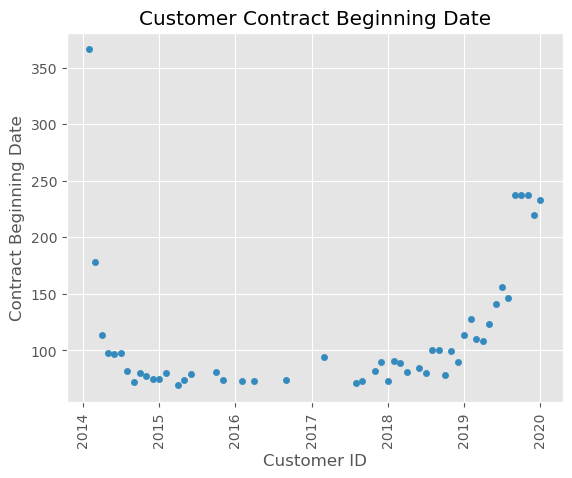

In [1203]:
print(df_customer_info['begin_date'].value_counts())

df_begin = df_customer_info.groupby('begin_date')['customer_id'].count().sort_values(ascending=False).reset_index().rename(columns={0:'begin_date', 'customer_id':'customer_id'}).head(50)
df_begin.plot(kind='scatter',
              x='begin_date',
              y='customer_id',
              xlabel='Customer ID',
              ylabel='Contract Beginning Date',
              title='Customer Contract Beginning Date')
plt.xticks(rotation=90)
plt.show()

              end_date  customer_id
0                   No         5174
1  2019-11-01 00:00:00          485
2  2019-12-01 00:00:00          466
3  2020-01-01 00:00:00          460
4  2019-10-01 00:00:00          458


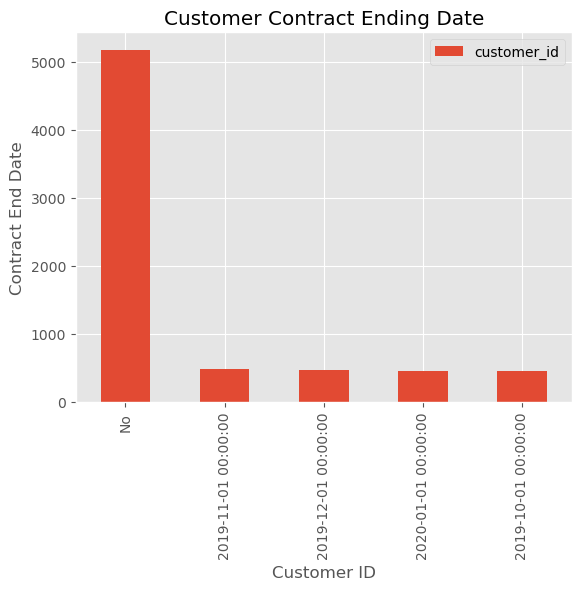

The percentage of customers that do not have end dates is 73.4630129206304 %


In [1204]:
df_end = df_customer_info.groupby('end_date')['customer_id'].count().sort_values(ascending=False).reset_index().rename(columns={0:'end_date', 'customer_id':'customer_id'})
print(df_end)
df_end.plot(kind='bar',
              x='end_date',
              y='customer_id',
              #bins=20,
              xlabel='Customer ID',
              ylabel='Contract End Date',
              title='Customer Contract Ending Date')
plt.xticks(rotation=90)
plt.show()
end_date_data = len(df_customer_info[df_customer_info['end_date'] == 'No']) / len(df_customer_info['end_date']) * 100
print('The percentage of customers that do not have end dates is', end_date_data, '%')

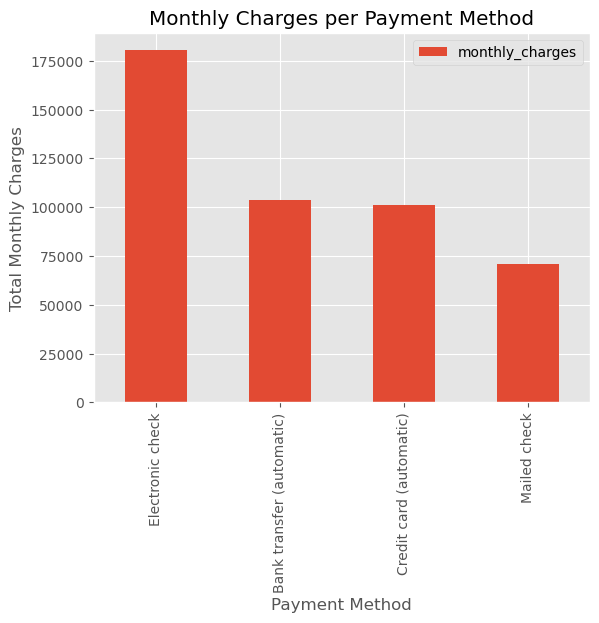

In [1205]:
df_payments = df_customer_info.groupby('payment_method')['monthly_charges'].sum().sort_values(ascending=False).reset_index().rename(columns={0:'payment_method', 'monthly_charges':'monthly_charges'}).head(50)

df_payments.plot(kind='bar',
              x='payment_method',
              y='monthly_charges',
              #bins=20,
              xlabel='Payment Method',
              ylabel='Total Monthly Charges',
              title='Monthly Charges per Payment Method')
plt.xticks(rotation=90)
plt.show()

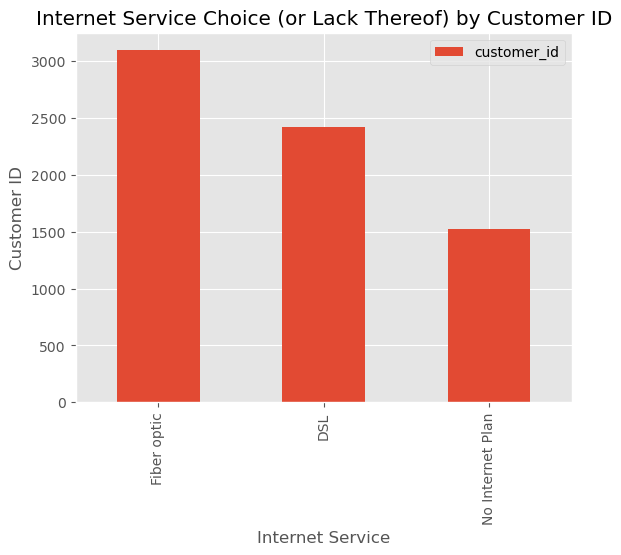

The percentage of customers that do not have a listed internet plan is 21.666903308249324 %


In [1206]:
df_internet_choice = df_customer_info.groupby('internet_service')['customer_id'].count().sort_values(ascending=False).reset_index().rename(columns={0:'internet_service', 'customer_id':'customer_id'}).head(50)

df_internet_choice.plot(kind='bar',
              x='internet_service',
              y='customer_id',
              #bins=20,
              xlabel='Internet Service',
              ylabel='Customer ID',
              title='Internet Service Choice (or Lack Thereof) by Customer ID')
plt.xticks(rotation=90)
plt.show()

internet_service_data = len(df_customer_info[df_customer_info['internet_service'] == 'No Internet Plan']) / len(df_customer_info['internet_service']) * 100
print('The percentage of customers that do not have a listed internet plan is', internet_service_data, '%')


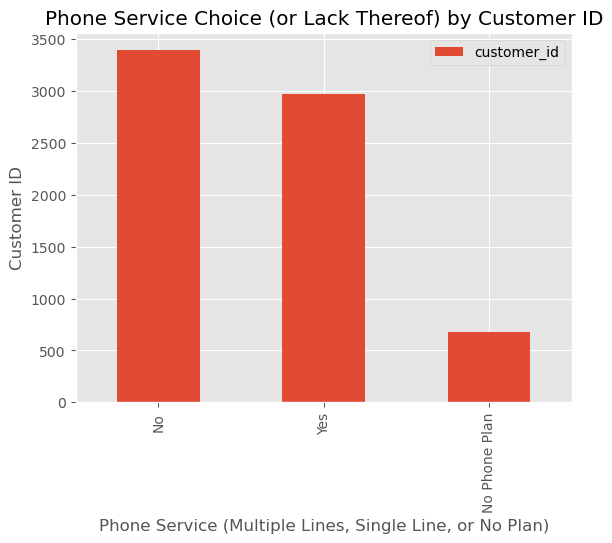

The percentage of customers that do not have a listed phone plan is 9.683373562402386 %


In [1207]:
df_phone_choice = df_customer_info.groupby('multiple_lines')['customer_id'].count().sort_values(ascending=False).reset_index().rename(columns={0:'multiple_lines', 'customer_id':'customer_id'}).head(50)

df_phone_choice.plot(kind='bar',
              x='multiple_lines',
              y='customer_id',
              #bins=20,
              xlabel='Phone Service (Multiple Lines, Single Line, or No Plan)',
              ylabel='Customer ID',
              title='Phone Service Choice (or Lack Thereof) by Customer ID')
plt.xticks(rotation=90)
plt.show()

phone_service_data = len(df_customer_info[df_customer_info['multiple_lines'] == 'No Phone Plan']) / len(df_customer_info['multiple_lines']) * 100
print('The percentage of customers that do not have a listed phone plan is', phone_service_data, '%')

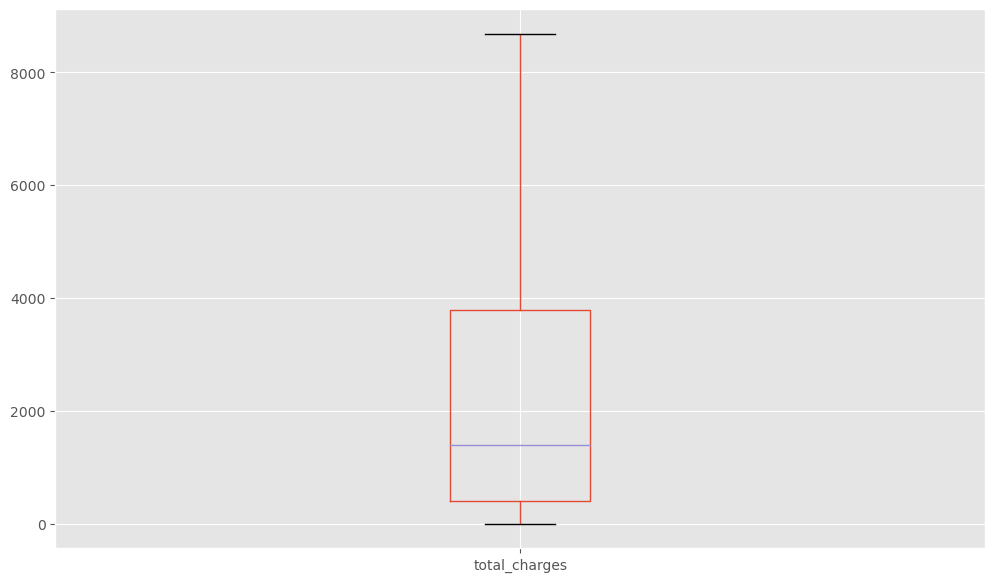

In [1208]:
total_charge_boxplot = df_customer_info.boxplot('total_charges', figsize=(12,7))


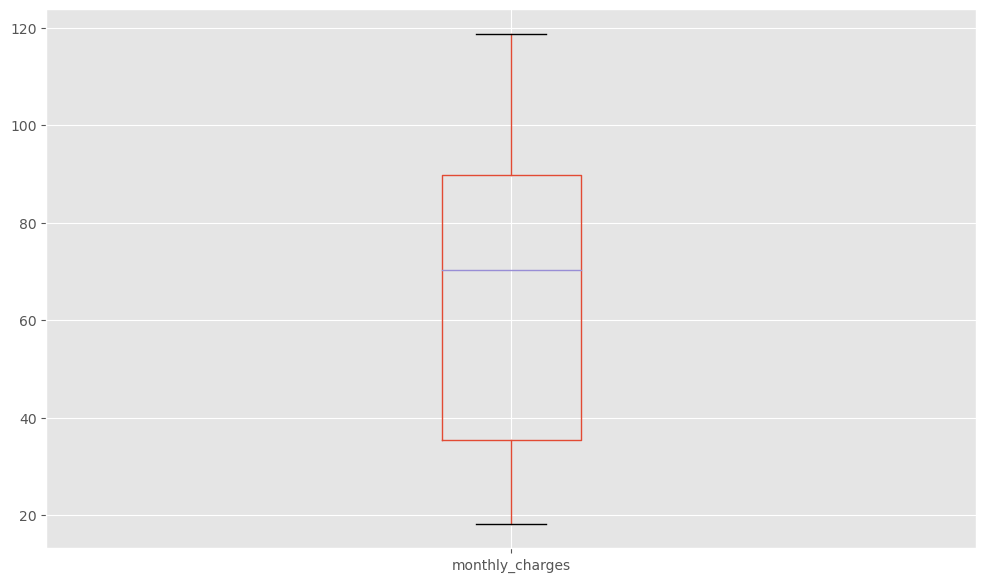

In [1209]:
monthly_charge_boxplot = df_customer_info.boxplot('monthly_charges', figsize=(12,7))


In [1210]:
df_customer_info['has_end_date'] = ''

In [1211]:
df_customer_info['has_end_date'] = df_customer_info['has_end_date'].where((df_customer_info['end_date'] == 'No') , 1) 

df_customer_info['has_end_date'] = df_customer_info['has_end_date'].where((df_customer_info['end_date'] != 'No') , 0) 


In [1212]:
#print(df_customer_info['has_end_date'].isna().sum())
df_customer_info['has_end_date'] = pd.to_numeric(df_customer_info['has_end_date'], errors='coerce')


In [1213]:
df_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   7043 non-null   object        
 13  online_security    7043 non-null   object        
 14  online_b

In [1214]:
display(df_customer_info.sample(15))

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,has_end_date
6160,0725-CXOTM,2017-02-01,No,One year,Yes,Credit card (automatic),89.65,3348.10,Female,0,...,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,0
742,5138-WVKYJ,2019-02-01,2019-12-01 00:00:00,Month-to-month,No,Electronic check,98.55,1008.55,Male,0,...,No,Fiber optic,Yes,No,No,No,Yes,Yes,Yes,1
833,2672-TGEFF,2017-01-01,No,Month-to-month,Yes,Electronic check,88.80,3340.55,Female,0,...,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,0
4070,0531-ZZJWQ,2015-07-01,No,Month-to-month,Yes,Electronic check,74.00,4052.40,Male,1,...,No,Fiber optic,No,No,No,No,No,No,Yes,0
2143,4079-VTGLK,2017-08-01,No,Two year,No,Electronic check,74.85,2181.75,Male,1,...,No,DSL,No,No,Yes,No,Yes,Yes,Yes,0
119,9445-ZUEQE,2017-11-01,No,Month-to-month,Yes,Credit card (automatic),85.20,2151.60,Male,0,...,Yes,Fiber optic,No,Yes,No,Yes,No,No,Yes,0
2761,2408-WITXK,2019-01-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,34.70,329.80,Female,1,...,No,DSL,No,No,No,No,No,Yes,No Phone Plan,1
4560,2252-ISRNH,2019-05-01,No,One year,Yes,Electronic check,90.35,767.90,Male,0,...,Yes,Fiber optic,No,No,Yes,No,Yes,No,Yes,0
5206,7349-ALMUX,2017-01-01,No,Two year,No,Bank transfer (automatic),65.60,2313.80,Male,0,...,No,DSL,Yes,Yes,Yes,Yes,No,No,No,0
3009,8896-BQTTI,2020-01-01,No,Month-to-month,Yes,Mailed check,25.00,25.00,Male,0,...,No,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,No Internet Plan,Yes,0


<h2>Encoding Categorical Variables</h2>
Label Encoding for Most Models and One-Hot Encoding for XGBoost

In [1215]:
categorical_features = ['type', 'paperless_billing', 'payment_method', 'gender', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']


In [1216]:
df_customer_info_encoded = pd.get_dummies(df_customer_info, columns=categorical_features)

In [1217]:
df_customer_info_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   customer_id                               7043 non-null   object        
 1   begin_date                                7043 non-null   datetime64[ns]
 2   end_date                                  7043 non-null   object        
 3   monthly_charges                           7043 non-null   float64       
 4   total_charges                             7043 non-null   float64       
 5   senior_citizen                            7043 non-null   int64         
 6   has_end_date                              7043 non-null   int64         
 7   type_Month-to-month                       7043 non-null   bool          
 8   type_One year                             7043 non-null   bool          
 9   type_Two year                 

In [1218]:
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_customer_info[col] = le.fit_transform(df_customer_info[col])
    label_encoders[col] = le

<h2>Splitting the Data</h2>

In [1219]:
X = df_customer_info.drop(['customer_id', 'begin_date', 'end_date', 'has_end_date'], axis=1)
y = df_customer_info.has_end_date

X_train1, X_test, y_train1, y_test = train_test_split (X, y, test_size=0.20, random_state=54321)
X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.25, random_state=54321)

In [1220]:
X_encoded = df_customer_info_encoded.drop(['customer_id', 'begin_date', 'end_date', 'has_end_date'], axis=1)
y_encoded = df_customer_info_encoded.has_end_date

X_train1_encoded, X_test_encoded, y_train1_encoded, y_test_encoded = train_test_split (X_encoded, y_encoded, test_size=0.20, random_state=54321)
X_train_encoded, X_valid_encoded, y_train_encoded, y_valid_encoded = train_test_split(X_train1_encoded, y_train1_encoded, test_size=0.25, random_state=54321)

<h2>Scaling the Data</h2>

In [1221]:
numeric = ['monthly_charges', 'total_charges']

In [1222]:
def scaling(features_train, features_test, features_valid):
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    #display(features_train.sample(10))
    #display(features_test.sample(10))
    return features_train, features_test, features_valid

In [1223]:
scaling(X_train, X_test, X_valid)

(      type  paperless_billing  payment_method  monthly_charges  total_charges  \
 5997     0                  1               2         0.812812      -0.775064   
 2115     2                  1               2         1.776911       2.691718   
 4712     1                  1               2         1.429969       1.359153   
 2185     0                  0               2        -0.354783      -0.431445   
 5496     2                  0               3        -1.372258      -0.545270   
 ...    ...                ...             ...              ...            ...   
 3692     0                  1               0         0.125599      -0.914020   
 1286     1                  0               1         0.290730      -0.984406   
 4687     0                  1               1         0.977943      -0.179145   
 5077     2                  0               3        -1.519041      -0.953763   
 4737     2                  1               0         1.671828       2.619604   
 
       gender 

In [1224]:
scaling(X_train_encoded, X_test_encoded, X_valid_encoded)

(      monthly_charges  total_charges  senior_citizen  type_Month-to-month  \
 5997         0.812812      -0.775064               0                 True   
 2115         1.776911       2.691718               0                False   
 4712         1.429969       1.359153               0                False   
 2185        -0.354783      -0.431445               0                 True   
 5496        -1.372258      -0.545270               0                False   
 ...               ...            ...             ...                  ...   
 3692         0.125599      -0.914020               0                 True   
 1286         0.290730      -0.984406               0                False   
 4687         0.977943      -0.179145               0                 True   
 5077        -1.519041      -0.953763               0                False   
 4737         1.671828       2.619604               0                False   
 
       type_One year  type_Two year  paperless_billing_No  \
 

<h2>Upsampling and Downsampling</h2>
For future use with the chosen models

In [1225]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=54321)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=54321)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=54321
    )

    return features_downsampled, target_downsampled


In [1226]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=54321
    )

    return features_upsampled, target_upsampled

In [1227]:
upsample_X_train, upsample_y_train = upsample(X_train, y_train, 5)
downsample_X_train, downsample_y_train = downsample(X_train, y_train, 0.2)

upsample_X_test, upsample_y_test = upsample(X_test, y_test, 5)
downsample_X_test, downsample_y_test = downsample(X_test, y_test, 0.2)

upsample_X_valid, upsample_y_valid = upsample(X_valid, y_valid, 5)
downsample_X_valid, downsample_y_valid = downsample(X_valid, y_valid, 0.2)


In [1228]:
upsample_X_train_encoded, upsample_y_train_encoded = upsample(X_train_encoded, y_train_encoded, 5)
downsample_X_train_encoded, downsample_y_train_encoded = downsample(X_train_encoded, y_train_encoded, 0.2)

upsample_X_test_encoded, upsample_y_test_encoded = upsample(X_test_encoded, y_test_encoded, 5)
downsample_X_test_encoded, downsample_y_test_encoded = downsample(X_test_encoded, y_test_encoded, 0.2)

upsample_X_valid_encoded, upsample_y_valid_encoded = upsample(X_valid_encoded, y_valid_encoded, 5)
downsample_X_valid_encoded, downsample_y_valid_encoded = downsample(X_valid_encoded, y_valid_encoded, 0.2)

<h2>Evaluation - AUC-ROC</h2>

In [1229]:
def scores_auc (model_name, features_name, target_name):
    probabilities_valid = model_name.predict_proba(features_name)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_name, probabilities_one_valid)
    print(auc_roc)
    
    fpr, tpr, thresholds = roc_curve(target_name, probabilities_one_valid) 

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show() 
    return

<h2>Models</h2>

<h3>Dummy Model</h3>

In [1230]:
dummy_class = DummyClassifier(strategy='uniform')
dummy_class.fit(X_train_encoded, y_train_encoded)

DummyClassifier(strategy='uniform')

0.5


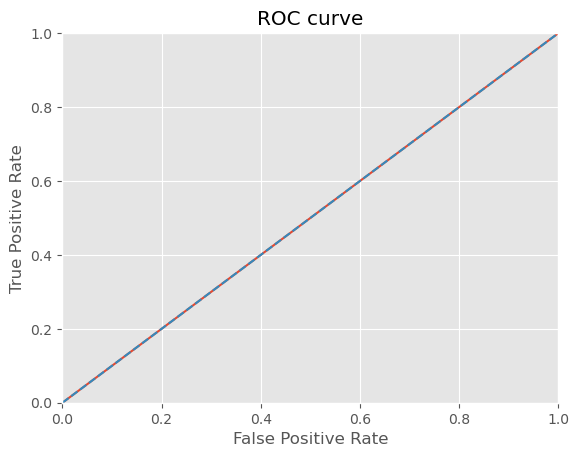

In [1231]:
scores_auc(dummy_class, X_train_encoded, y_train_encoded)


<h3>Decision Tree Classifier</h3>

In [1232]:
def train_decision_model(a, b, train_features_train, target_train):
    best_decision_f1 = 0
    best_depth = 0

    for depth in range(a,b):
        decision_model = DecisionTreeClassifier(random_state=54321, max_depth=depth, class_weight='balanced')
        decision_model.fit(train_features_train, target_train)
        decision_scores = cross_val_score(decision_model, train_features_train, target_train, cv=5, scoring=make_scorer(f1_score))
        final_score = sum(decision_scores) / len(decision_scores)
        #print('The F1 score for', depth, 'is', final_score) 
          
        if best_decision_f1 == 0:
            best_decision_f1 = final_score
            best_depth = depth
        if final_score < best_decision_f1:
            best_decision_f1 = final_score
            best_depth = depth
            
            

                
    decided_decision_model = DecisionTreeClassifier(random_state=54321, max_depth=best_depth, class_weight='balanced')
    decided_decision_model.fit(train_features_train, target_train)
    decided_decision_scores = cross_val_score(decision_model, train_features_train, target_train, cv=5, scoring=make_scorer(f1_score))
    decided_final_score = sum(decided_decision_scores) / len(decided_decision_scores) 
    print(best_depth)
    print(decided_final_score)
    
    return decided_decision_model

<h3>Random Forest Classifier</h3>

In [1233]:
def train_random_model(a, b, train_features_train, target_train):


    best_random_f1 = 0
    best_est = 0

    for est in range(a,b):
        random_model = RandomForestClassifier(random_state=54321, n_estimators=est, class_weight='balanced')
        random_model.fit(train_features_train, target_train)
        random_scores = cross_val_score(random_model, train_features_train, target_train, cv=5, scoring=make_scorer(f1_score))
        final_score = sum(random_scores) / len(random_scores)
        #print('The F1 score for', est, 'is', final_score) 
  
        if best_random_f1 == 0:
            best_random_f1 = final_score
            best_est = est
        if final_score < best_random_f1:
            best_random_f1 = final_score
            best_est = est
            

    final_random_model = RandomForestClassifier(random_state=54321, n_estimators=best_est, class_weight='balanced')
    final_random_model.fit(train_features_train, target_train)
    final_random_scores = cross_val_score(final_random_model, train_features_train, target_train, cv=5, scoring=make_scorer(f1_score))
    final_final_score = sum(final_random_scores) / len(final_random_scores)
    print(best_est)
    print(final_final_score)

    return final_random_model

<h3>Logistic Regression</h3>

In [1234]:
def train_logistic_model(features_train, target_train):

    logistic_model = LogisticRegression(class_weight='balanced')
    logistic_model.fit(features_train, target_train)
    return logistic_model

<h3>LightGBM</h3>

In [1235]:
def lgbm(a, b, features_train, target_train):

    best_lgbm_f1 = 0
    best_est = 0

    for est in range(a,b):
        lgbm_model = LGBMClassifier(num_leaves=5, n_estimators=est, random_state=54321, class_weight='balanced')
        lgbm_model.fit(features_train, target_train)
        lgbm_scores = cross_val_score(lgbm_model, features_train, target_train, cv=5, scoring=make_scorer(f1_score))
        final_score = sum(lgbm_scores) / len(lgbm_scores)
        #print('The F1 score for', est, 'is', final_score) 
  
        if best_lgbm_f1 == 0:
            best_lgbm_f1 = final_score
            best_est = est
        if final_score < best_lgbm_f1:
            best_lgbm_f1 = final_score
            best_est = est

            
    final_lgbm_model = LGBMClassifier(num_leaves=5, max_depth=10, n_estimators=best_est, random_state=54321, class_weight='balanced')
    final_lgbm_model.fit(features_train, target_train)
    final_lgbm_scores = cross_val_score(final_lgbm_model, features_train, target_train, cv=5, scoring=make_scorer(f1_score))
    final_final_score = sum(final_lgbm_scores) / len(final_lgbm_scores)

    print('The final F1 for', best_est, 'is', final_final_score) 
    return final_lgbm_model

<h3>CatBoost</h3>

In [1236]:
def cat(a, b, features_train, target_train):

    best_cat_f1 = 0
    best_its = 0

    for its in range(a,b):
        cat_model = CatBoostClassifier(loss_function="Logloss", iterations=its, random_seed=54321)
        cat_model.fit(features_train, target_train, cat_features=categorical_features, verbose=10)

        cat_scores = cross_val_score(cat_model, features_train, target_train, cv=5, scoring=make_scorer(f1_score))
        final_score = sum(cat_scores) / len(cat_scores)
        #print('The F1 score for', its, 'is', final_score) 
  
        if best_cat_f1 == 0:
            best_cat_f1 = final_score
            best_its = its
        if final_score < best_cat_f1:
            best_cat_f1 = final_score
            best_its = its
            

    final_cat_model = CatBoostClassifier(loss_function='Logloss', iterations=best_its, random_seed=54321)
    final_cat_model.fit(features_train, target_train, cat_features=categorical_features, verbose=10)
    final_cat_scores = cross_val_score(cat_model, features_train, target_train, cv=5, scoring=make_scorer(f1_score))
    final_final_score = sum(final_cat_scores) / len(final_cat_scores)
    print('The final F1 for', best_its, 'is', final_final_score) 
    return final_cat_model

<h3>XGBoost<h3>

In [1237]:
def xgb(a, b, features_train, target_train):

    best_xgb_f1 = 0
    best_est = 0

    # Set class weights
    class_weights = {0: 1, 1: 10}  # Class 0: 1, Class 1: 10

    # Set "scale_pos_weight" based on class balance
    pos_weight = sum(class_weights.values()) / sum(class_weights.keys())

    for est in range(a,b):
        xgb_model = XGBClassifier(scale_pos_weight=pos_weight, objective='binary:logistic', n_estimators=est, random_state=42)
        xgb_model.fit(features_train, target_train)
        xgb_scores = cross_val_score(xgb_model, features_train, target_train, cv=5, scoring=make_scorer(f1_score))
        final_score = sum(xgb_scores) / len(xgb_scores)
        #print('The F1 score for', est, 'is', final_score) 
  
        if best_xgb_f1 == 0:
            best_xgb_f1 = final_score
            best_est = est
        if final_score < best_xgb_f1:
            best_xgb_f1 = final_score
            best_est = est
            

    final_xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=best_est, random_state=42)
    final_xgb_model.fit(features_train, target_train)
    final_xgb_scores = cross_val_score(xgb_model, features_train, target_train, cv=5, scoring=make_scorer(f1_score))
    final_final_score = sum(final_xgb_scores) / len(final_xgb_scores)
    print('The final F1 score for', best_est, 'is', final_final_score)

    return final_xgb_model

<h2>Calling the Models and Looking at the Curves</h2>

20
0.4855437787201652
0.6723048903355808


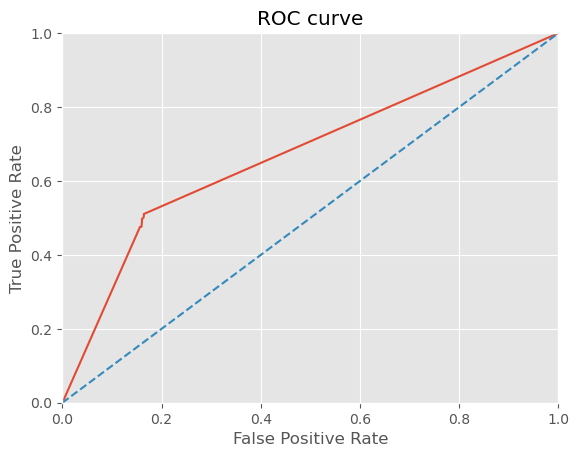

2
0.9407635521446889
0.8035418119817097


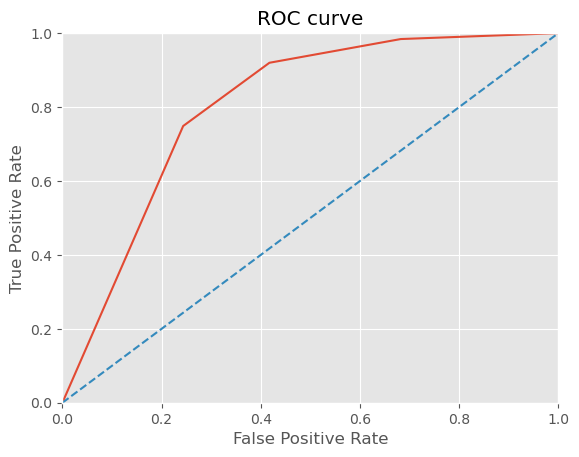

12
0.7694687084835367
0.706528197576791


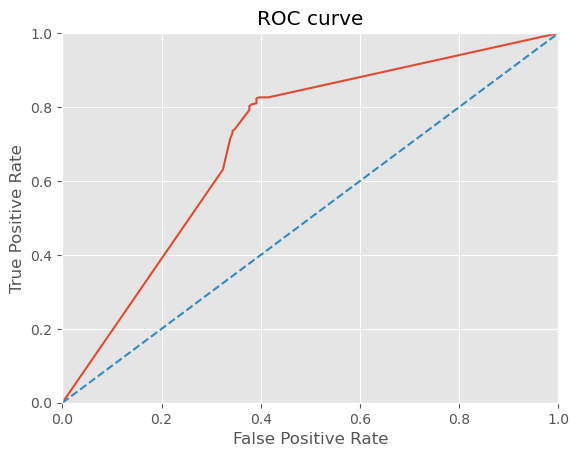

In [1238]:
decision_AUC = train_decision_model(1, 21, X_train, y_train)
scores_auc(decision_AUC, X_valid, y_valid)

upsample_decision_AUC = train_decision_model(1, 21, upsample_X_train, upsample_y_train)
scores_auc(upsample_decision_AUC, upsample_X_valid, upsample_y_valid)

downsample_decision_AUC = train_decision_model(1, 21, downsample_X_train, downsample_y_train)
scores_auc(downsample_decision_AUC, downsample_X_valid, downsample_y_valid)



2
0.3965845252983007
0.6982084269808055


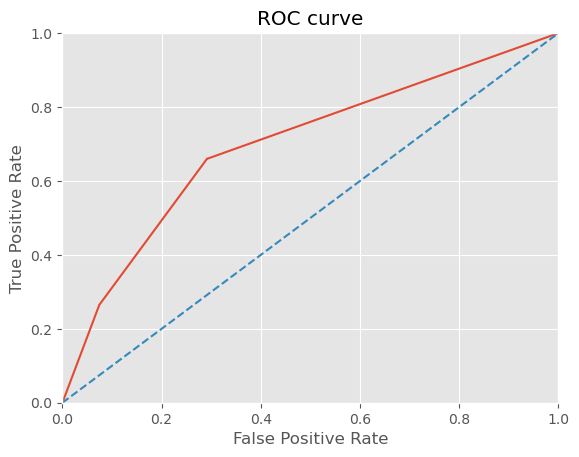

1
0.9139012914796376
0.6400837014647757


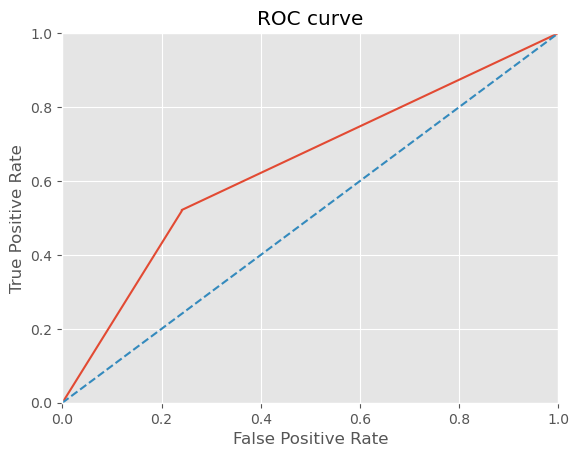

2
0.6993129722927212
0.752325040688212


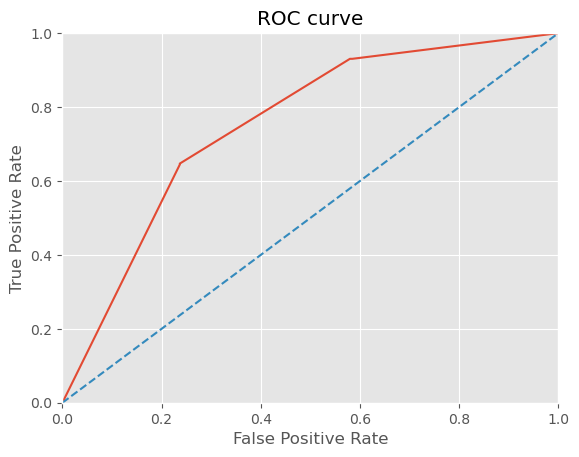

In [1239]:
random_AUC = train_random_model(1, 11, X_train, y_train)
scores_auc(random_AUC, X_valid, y_valid)

upsample_random_AUC = train_random_model(1, 11, upsample_X_train, upsample_y_train)
scores_auc(upsample_random_AUC, upsample_X_valid, upsample_y_valid)

downsample_random_AUC = train_random_model(1, 11, downsample_X_train, downsample_y_train)
scores_auc(downsample_random_AUC, downsample_X_valid, downsample_y_valid)

0.8428479165052055


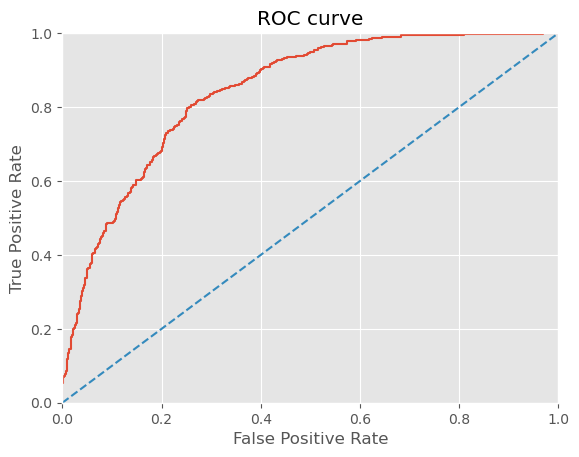

0.8428479165052054


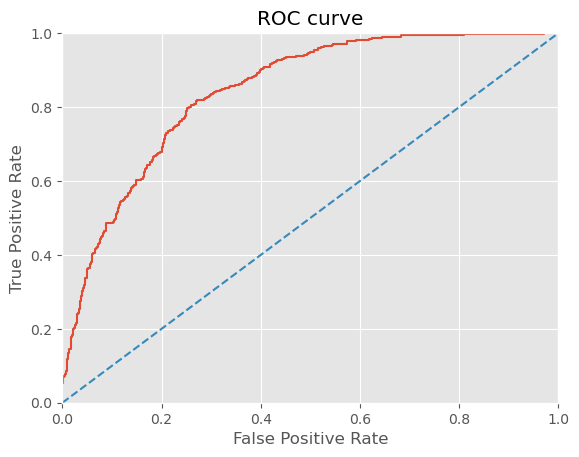

0.8574491720271771


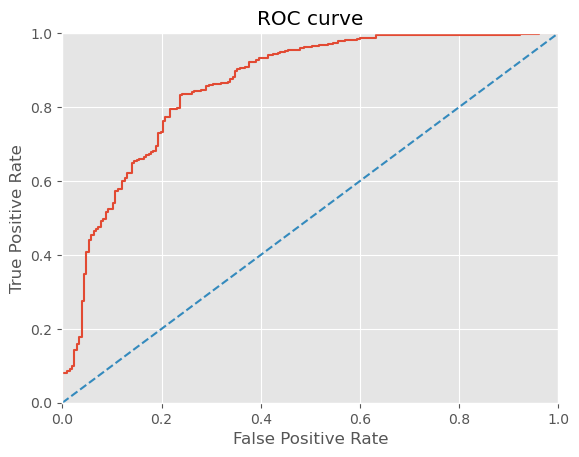

In [1240]:
logistic_AUC = train_logistic_model(X_train, y_train)
scores_auc(logistic_AUC, X_valid, y_valid)

upsample_logistic_AUC = train_logistic_model(upsample_X_train, upsample_y_train)
scores_auc(upsample_logistic_AUC, upsample_X_valid, upsample_y_valid)

downsample_logistic_AUC = train_logistic_model(downsample_X_train, downsample_y_train)
scores_auc(downsample_logistic_AUC, downsample_X_valid, downsample_y_valid)

The final F1 for 3 is 0.5795969939751235
0.8368518949081609


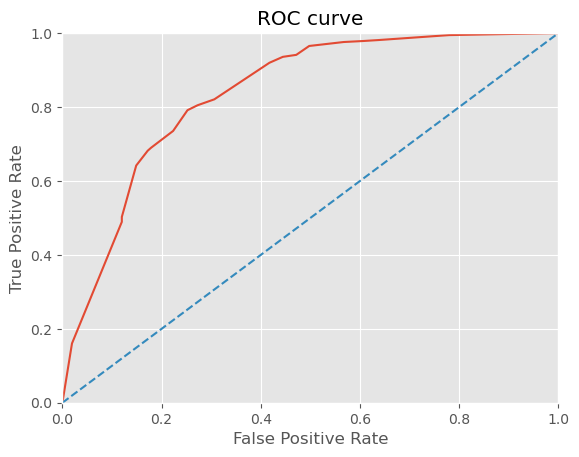

The final F1 for 1 is 0.7758707585613651
0.8160918649409699


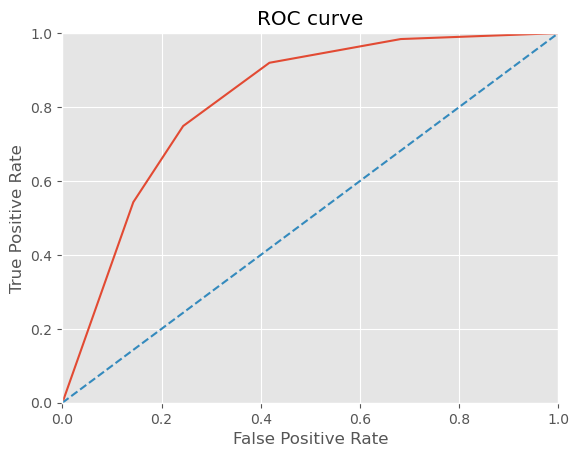

The final F1 for 1 is 0.761786315428358
0.8334431269213878


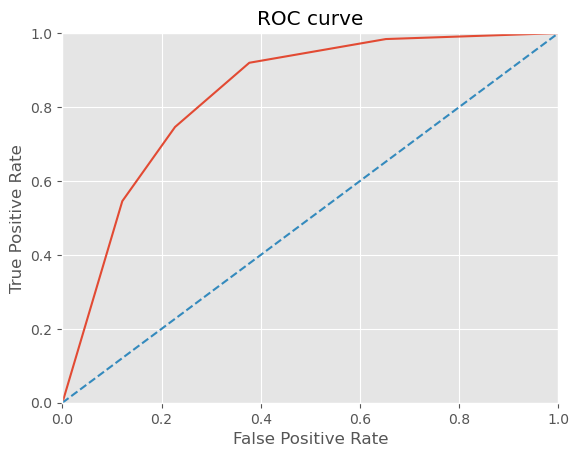

In [1241]:
lgbm_AUC = lgbm(1, 11, X_train, y_train)
scores_auc(lgbm_AUC, X_valid, y_valid)

upsample_lgbm_AUC = lgbm(1, 11, upsample_X_train, upsample_y_train)
scores_auc(upsample_lgbm_AUC, upsample_X_valid, upsample_y_valid)

downsample_lgbm_AUC = lgbm(1, 11, downsample_X_train, downsample_y_train)
scores_auc(downsample_lgbm_AUC, downsample_X_valid, downsample_y_valid)

Learning rate set to 0.5
0:	learn: 0.5522488	total: 2.62ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5546296	total: 1.27ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5424313	total: 1.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5556605	total: 1.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5510268	total: 1.16ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5513669	total: 1.19ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5522488	total: 2.68ms	remaining: 2.68ms
1:	learn: 0.4958042	total: 4.74ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5546296	total: 927us	remaining: 927us
1:	learn: 0.4997842	total: 1.72ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5424313	total: 769us	remaining: 769us
1:	learn: 0.4877038	total: 1.47ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5556605	total: 745us	remaining: 745us
1:	learn: 0.5024842	total: 1.48ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5510268	total: 812us	re

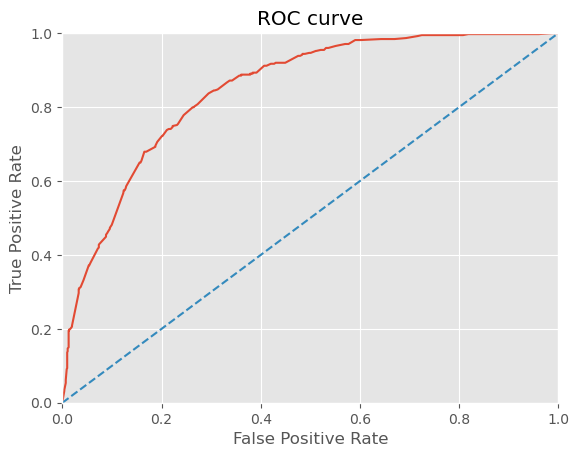

Learning rate set to 0.5
0:	learn: 0.5637846	total: 3.05ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5637104	total: 1.34ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5570743	total: 1.07ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5576337	total: 1.15ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5561102	total: 1.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5579948	total: 1.04ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5637846	total: 2.58ms	remaining: 2.58ms
1:	learn: 0.5121020	total: 4.68ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5637104	total: 917us	remaining: 917us
1:	learn: 0.5144489	total: 1.82ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5570743	total: 933us	remaining: 933us
1:	learn: 0.5034555	total: 1.86ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5576337	total: 1.2ms	remaining: 1.2ms
1:	learn: 0.5045670	total: 2.31ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5561102	total: 1.01ms	

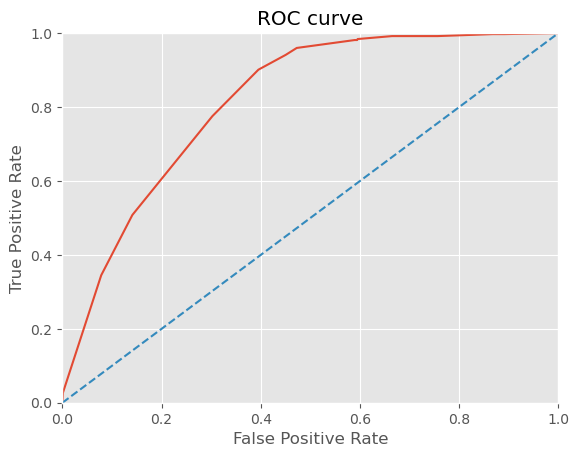

Learning rate set to 0.5
0:	learn: 0.5784657	total: 1.19ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5633359	total: 873us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5765144	total: 850us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5734046	total: 1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5840509	total: 1.03ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5728187	total: 758us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5784657	total: 1.34ms	remaining: 1.34ms
1:	learn: 0.5279696	total: 2.86ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5633359	total: 760us	remaining: 760us
1:	learn: 0.5147312	total: 1.46ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5765144	total: 784us	remaining: 784us
1:	learn: 0.5252936	total: 1.48ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5734046	total: 710us	remaining: 710us
1:	learn: 0.5271764	total: 1.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5840509	total: 720us	remaini

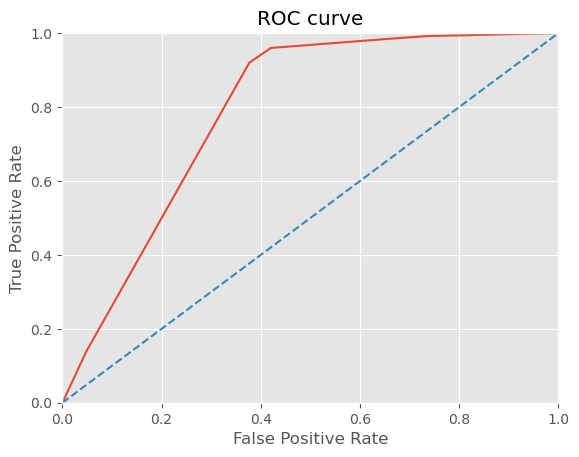

In [1242]:
cat_AUC = cat(1, 41, X_train, y_train)
scores_auc(cat_AUC, X_valid, y_valid)

upsample_cat_AUC = cat(1, 41, upsample_X_train, upsample_y_train)
scores_auc(upsample_cat_AUC, upsample_X_valid, upsample_y_valid)

downsample_cat_AUC = cat(1, 41, downsample_X_train, downsample_y_train)
scores_auc(downsample_cat_AUC, downsample_X_valid, downsample_y_valid)

The final F1 score for 1 is 0.5687054156359117
0.8393267715518355


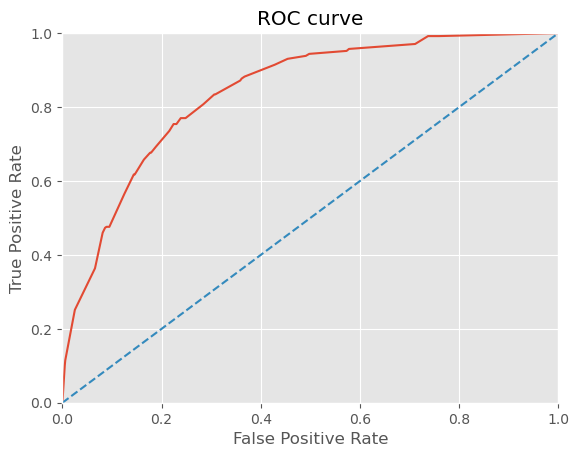

The final F1 score for 1 is 0.8567778659799394
0.8278824046087474


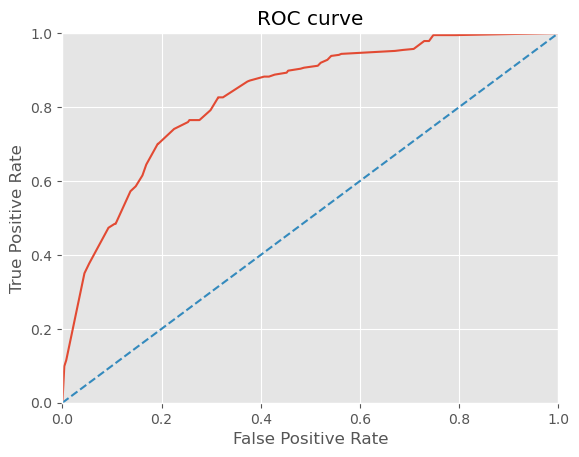

The final F1 score for 5 is 0.8304391637933817
0.8627967656100648


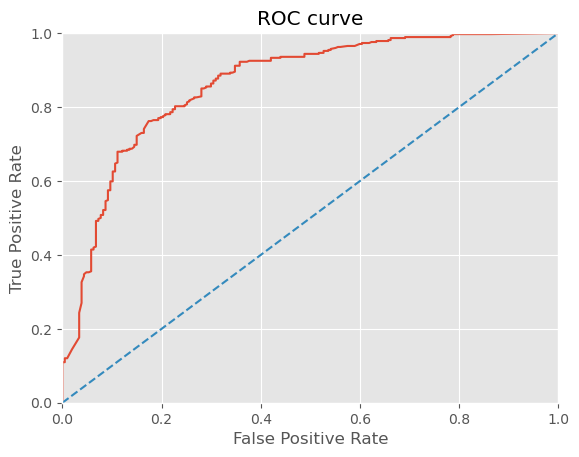

In [1243]:
xgb_AUC = xgb(1, 11, X_train_encoded, y_train_encoded)
scores_auc(xgb_AUC, X_valid_encoded, y_valid_encoded)

upsample_xgb_AUC = xgb(1, 11, upsample_X_train_encoded, upsample_y_train_encoded)
scores_auc(upsample_xgb_AUC, upsample_X_valid_encoded, upsample_y_valid_encoded)

downsample_xgb_AUC = xgb(1, 11, downsample_X_train_encoded, downsample_y_train_encoded)
scores_auc(downsample_xgb_AUC, downsample_X_valid_encoded, downsample_y_valid_encoded)

<h2>Choosing a Model and Using the Test Data</h2>
XGBoost had the best AUC-ROC score, so that is the model I went with.

0.8193835374766875


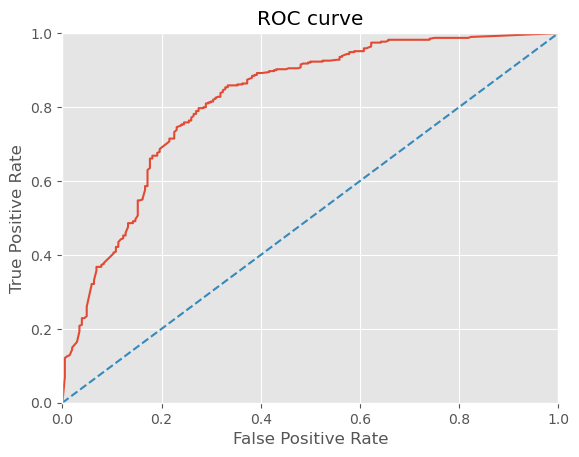

In [1247]:
test_xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=5, random_state=42)
test_xgb_model.fit(downsample_X_train, downsample_y_train)
scores_auc(test_xgb_model, downsample_X_test, downsample_y_test)